# Machine Learning Project

### Project Name : "Decoding Dollars: Adult Census Income Prediction"

### Project By : Aditya Anil Patade

### Guided By : Sameer Warsolkar Sir

## Abstract

### The Adult Census Income Prediction Project aims to develop a machine learning model to predict whether an individual's income exceeds $50,000 per year based on demographic and employment attributes from the U.S. Census Bureau's Adult dataset. This project involves several key steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation.
### Various algorithms, such as Logistic Regression, KNeighbor Classifier,Decision Trees and Random Forests are tested and optimized using techniques like GridSearchCV to find the best hyperparameters. The final model's performance is evaluated using metrics like accuracy, precision, recall, and the F1-score. The goal is to provide insights into the factors influencing income levels and build a robust predictive model for practical applications in fields like economic planning and policy-making.

In [270]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [271]:
#Loading and Displaying Adult Census Income Data
data = pd.read_csv("Adult Census Income Dataset.csv")

## Attribute Information

#### age: continuous – age of a Person
#### workclass: Where do a person works – categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
#### fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics – continuous
#### education: Degree the person has – Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
#### education-num: no. of years a person studied – continuous.
#### marital.status: No of people - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
#### occupation: people's occupation - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
#### relationship: people's relationship- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
#### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
#### sex: Gender - Female, Male.
#### capital.gain: Investment gain of the person other than salary – continuous
#### capital.loss: Loss from investments – continuous
#### hours.per.week: No. of hours a person works – continuous.
#### native-country: Individual person country.
#### income: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [272]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [273]:
#Displaying the Initial Data Entries
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [274]:
#Summary Statistics of the Loaded Dataset
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Cleaning

In [275]:
#Dataset Overview: Structure and Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [276]:
#Identifying Missing Data in the Dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [277]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [278]:
#Workclass Frequency Count
data["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [279]:
#Occupation Frequency Count
data["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [280]:
#Native Country Frequency Count
data["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [281]:
#Determining Most Frequent Workclass Value
data["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [282]:
#Determining the Most Frequent Occupation
data["occupation"].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [283]:
#Determining the Most Common Native Country
data["native.country"].mode()

0    United-States
Name: native.country, dtype: object

In [284]:
#Imputation of Placeholder Values in Dataset Columns
data["workclass"].replace("?","Private",inplace = True)
data["occupation"].replace("?","Prof-specialty",inplace = True)
data["native.country"].replace("?","United-States",inplace = True)

#### Replacing all instances of '?' in the "workclass","occupation","native.country" column with "Private","Prof-specialty","United-States" respectively which we have obtained from determining the most frequent value by using mode.The mode of a set of values is the value that appears most often.

In [285]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [286]:
#Removing the 'Race' Column from the Dataset
data.drop('race', axis = 1,inplace = True)

#### Here the 'race' column does not provide useful information for the analysis or model, it has been removed to simplify the dataset and focus on more relevant features.

In [287]:
#Removing the 'fnlwgt' Column from the Dataset
data.drop('fnlwgt',axis = 1,inplace = True)

#### Here the 'fnlwgt' column does not provide useful information for the analysis or model, it has been removed to simplify the dataset and focus on more relevant features.

In [288]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


In [289]:
#Counting Unique Values in Each Column
data.nunique()

age                73
workclass           8
education          16
education.num      16
marital.status      7
occupation         14
relationship        6
sex                 2
capital.gain      119
capital.loss       92
hours.per.week     94
native.country     41
income              2
dtype: int64

In [290]:
#Count of Unique Values in the Income Column
data["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

#### Here the income data reveals that there are 24,720 individuals earning USD 50,000  or less,while USD 7,841 individuals earn more than $50,000.

In [291]:
#Count of Unique Values in the Sex Column
data["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

#### Here the sex data shows that there are 21,790 males and 10,771 females in the dataset.

In [294]:
#Percentage Distribution of Income Category
income = data["income"].value_counts(normalize = True)   #returns proportion rather than frequency
income*100

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

##### The data is skewed because we have 75 % of the data for people who has less than 50K salary which is represented as 0 and only 25 % of the data people with greater than 50K salary.

## Data Visualization

Salary Total Value: 32561
<=50K (0): & >50K (1)
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


Text(0.5, 1.0, 'Salary Position')

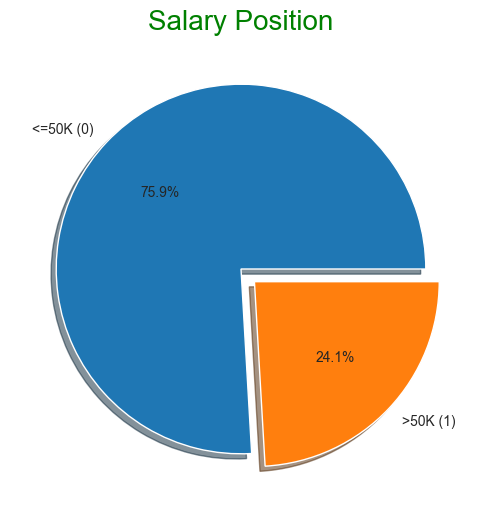

In [312]:
## Printing the total count of income values
print("Salary Total Value:",data["income"].value_counts().sum())

## Printing the value counts for income categories
print("<=50K (0): & >50K (1)")
print(data["income"].value_counts())

# Plotting the pie chart
sns.set_style("white")      #useful for creating publication-ready figures or for enhancing clarity in visualizations.
plt.figure(figsize=(6,6))
plt.pie(income, labels= ["<=50K (0)",">50K (1)"], autopct='%1.1f%%',explode = [0,0.1],shadow = True)
plt.title('Salary Position',size = 20,color = "g")

#####  Out Of total people ,24720 are less than 50K (0) and 7841 are greater than 50K (1).From here we can infer that most people had salary or income less than 50K as compared to others. 

## Histogram

##### Histograms are one of the most common graphs used to display numeric data.
##### Distribution of the data - whether the data is normally distributed or if it's skewed

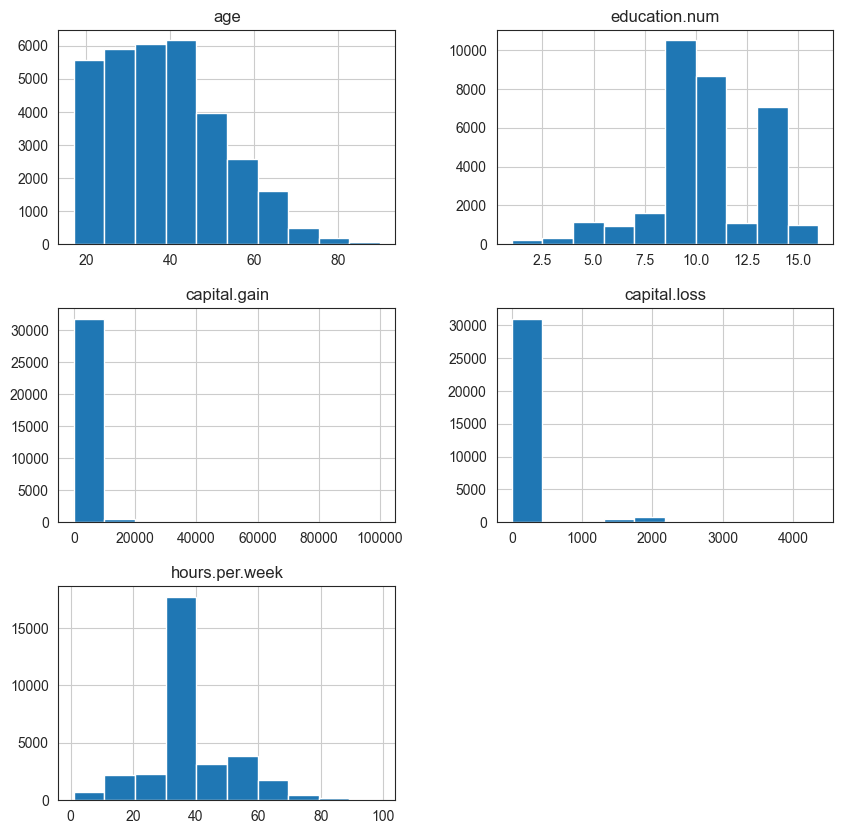

In [313]:
## Plotting histograms of the data
data.hist(figsize = (10,10))

# Displaying the plot
plt.show()

#### age: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.Age has a wide range of distribution in the interval of age  18-90 years. From the distribution of this variable, we can observe that most of the people are aged around 25 – 40 years.
#### education.num :  Most individuals completed between 8 to 12 years of education
#### capital.gain : The profit earned from selling an asset (such as stocks, real estate, or other investments) at a price higher than its purchase cost (capital-gain) is mostly between 0–10000 USD
#### capital.loss : The losses from selling an asset (such as stocks, real estate, or other investments) for a price lower than the original purchase price (capital-loss) is mostly between 0–450 USD
#### hours.per.week : Most people worked between 30–40 hours-per-week

In [314]:
# Calculating the normalized value counts of the "income" column as percentages
income_percentage = data["income"].value_counts(normalize=True) * 100

# Printing the title and the calculated percentages
print("Percentage Distribution of Income Categories")
print(income_percentage)

Percentage Distribution of Income Categories
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


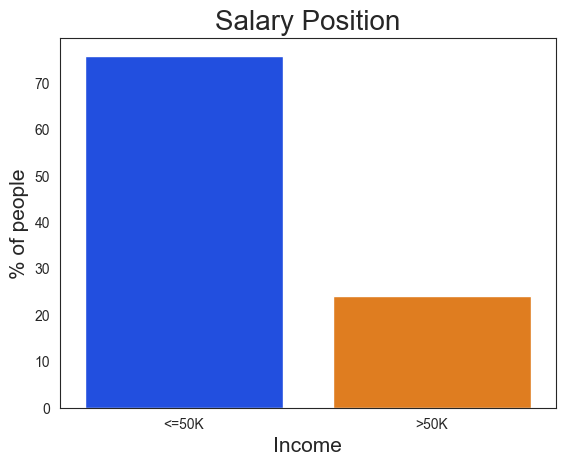

In [317]:
## Create a count plot for the "income" column with percentages
sns.countplot(x = "income",data = data, stat = "percent",palette = "bright")

# Set plot title and axis labels
plt.title("Salary Position",size = 20)
plt.xlabel("Income",size = 15)
plt.ylabel("% of people",size = 15)

# Show the plot
plt.show()

#### 76% of the employees earn 50K USD or less while the remaining 24% earn above 50k USD.

In [318]:
# Printing the title for the value counts of the "sex" column
print("Counts of Each Sex Category")
print(data["sex"].value_counts())

Counts of Each Sex Category
sex
Male      21790
Female    10771
Name: count, dtype: int64


In [319]:
# Calculating the normalized value counts of the "sex" column as percentages
sex_percentage = data["sex"].value_counts(normalize=True) * 100

# Printing the title and the calculated percentages
print("Percentage Distribution of Sex Categories")
print(sex_percentage)

Percentage Distribution of Sex Categories
sex
Male      66.920549
Female    33.079451
Name: proportion, dtype: float64


## Based on Gender and Income

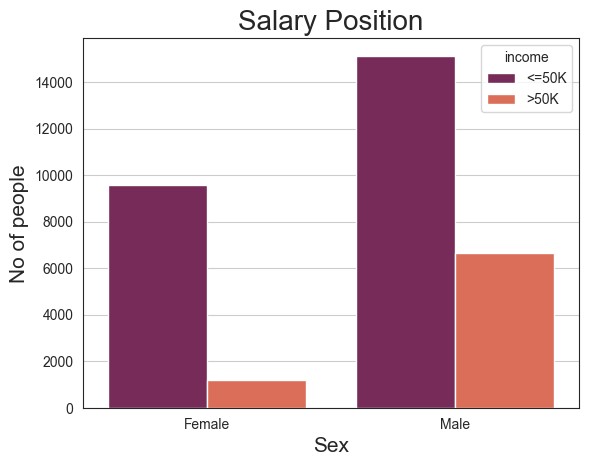

In [320]:
# Create a count plot for the "sex" column with hue based on "income"
sns.countplot(x = "sex",data = data,hue = "income",palette = "rocket")

# Set plot title and axis labels
plt.title("Salary Position",size = 20)
plt.xlabel("Sex",fontsize = 15)
plt.ylabel("No of people",fontsize = 15)

#Add grid lines to the y-axis
plt.grid(axis = "y")

# Show the plot
plt.show()

#### The figure above shows that Males in both income groups earn significantly more than the females respectively

## Based on education

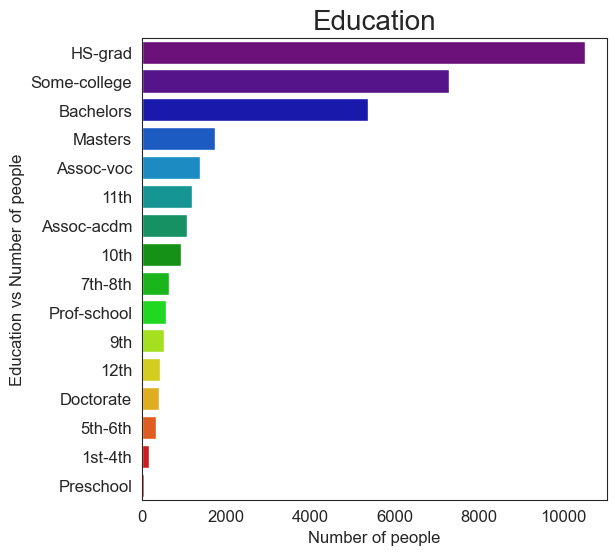

In [321]:
## Set the figure size
plt.figure(figsize = (6,6))

# Calculate the value counts for the "education" column
education = data["education"].value_counts()

# Create a bar plot for the education values
sns.barplot(x = education.values,y =  education.index, palette = "nipy_spectral")

# Set the plot title and axis labels
plt.title("Education",size = 20)
plt.xlabel("Number of people",size = 12)
plt.ylabel("Education vs Number of people",size = 12)

# Set the tick parameters
plt.tick_params(labelsize = 12)

# Show the plot
plt.show()

#### Here most of the people are from High School Graduate,have completed their Bachelors Degree and have completed there Masters.

## Based On Education and Income

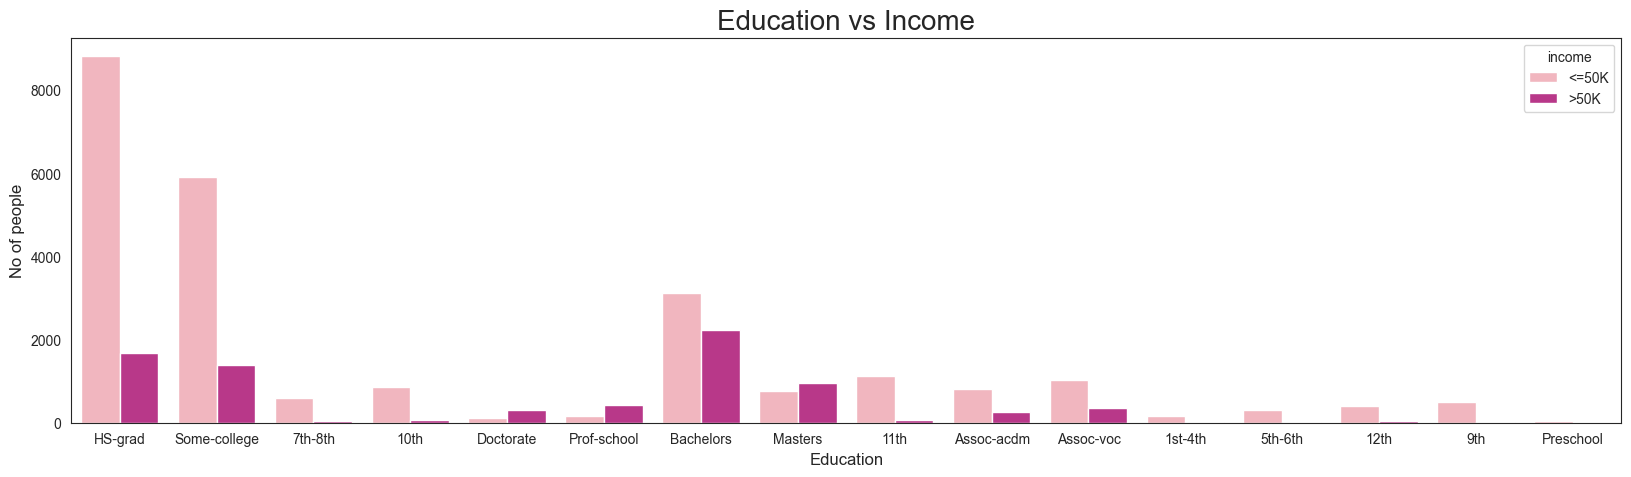

In [322]:
## Set the figure size
plt.figure(figsize = (20,5))

# Create a count plot for the "education" column with hue based on "income"
sns.countplot(data = data, x = "education",hue = "income",palette = "RdPu")

# Set the plot title and axis labels
plt.title("Education vs Income",size = 20)
plt.xlabel("Education",fontsize = 12)
plt.ylabel("No of people",fontsize = 12)

# Show the plot
plt.show()

##### From above plot we can conclude that majority of the workclass are High school grads, bachelors degree holders and college grads. The people who has Masters, HS-grad,Doctorate,Bachelors,Prof-school tend to be earning more than 50K than the other degrees.

## Based On Occupation and Income

In [323]:
# Printing the title for the value counts of the "occupation" column
print("Counts of Each Occupation Category")
print(data["occupation"].value_counts())

Counts of Each Occupation Category
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


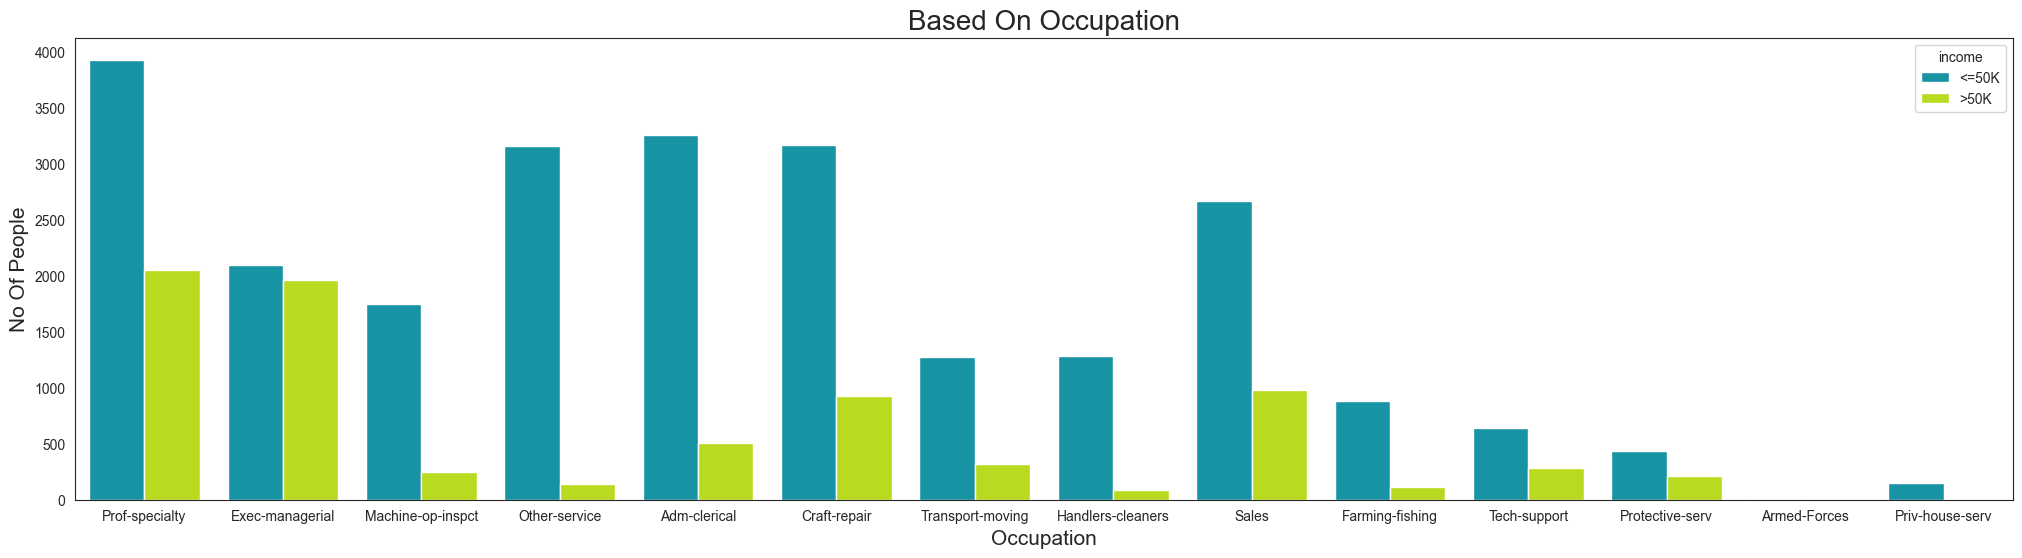

In [324]:
# Set the figure size
plt.figure(figsize = (25,6))

# Create a count plot for the "occupation" column with hue based on "income"
sns.countplot(data = data,x = "occupation",hue = "income",palette = "nipy_spectral")

# Set the plot title and axis labels
plt.title("Based On Occupation",size = 20)
plt.xlabel("Occupation",fontsize = 15)
plt.ylabel("No Of People",fontsize = 15)

# Show the plot
plt.show()

#### Majority of the adults work in the prof-specialty, craft-repair, adm-clerical, exec-managerial, sales and other-services occupation.
#### Here the number of people with respect to occupation has income greater than USD 50K are Prof-speciality,Exec-managerial,Sales,Craft-repair.

## Based On Workclass and Income

In [325]:
# Printing the title for the value counts of the "workclass" column
print("Counts of Each Workclass Category")
print(data["workclass"].value_counts())

Counts of Each Workclass Category
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


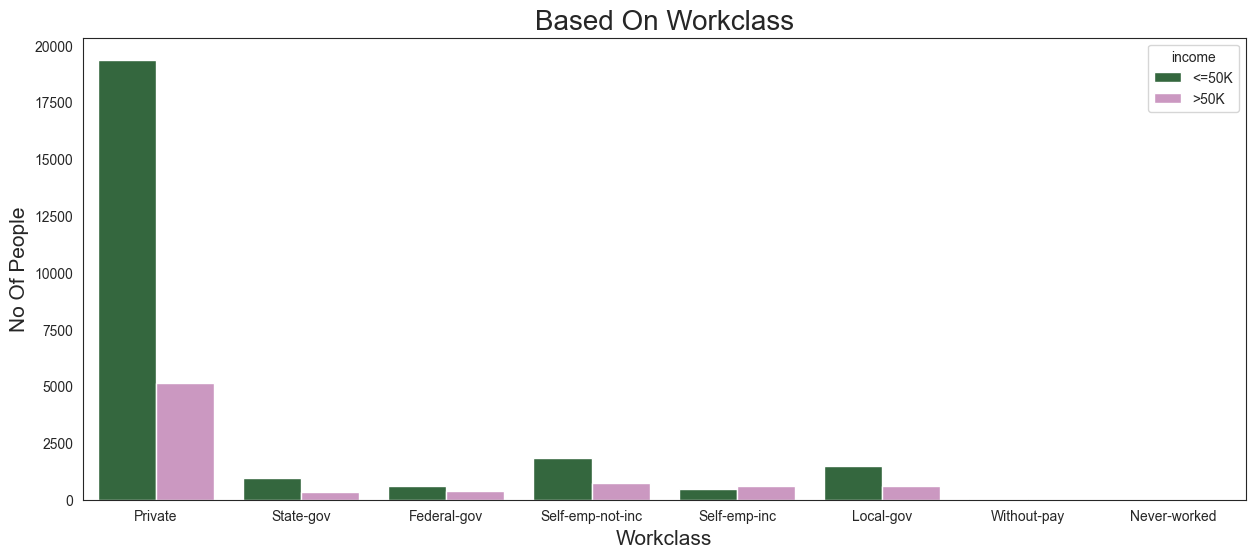

In [326]:
# Set the figure size
plt.figure(figsize = (15,6))

# Create a count plot for the "workclass" column with hue based on "income"
sns.countplot(data = data,x = "workclass",hue = "income",palette = "cubehelix")

# Set the plot title and axis labels
plt.title("Based On Workclass",size = 20)
plt.xlabel("Workclass",fontsize = 15)
plt.ylabel("No Of People",fontsize = 15)

# Show the plot
plt.show()

#### From above we can see that 70% of workclass fall under the private and Private sector has the highest number of people who has income greater than USD 50K.

## Based On Marital-Status and workclass

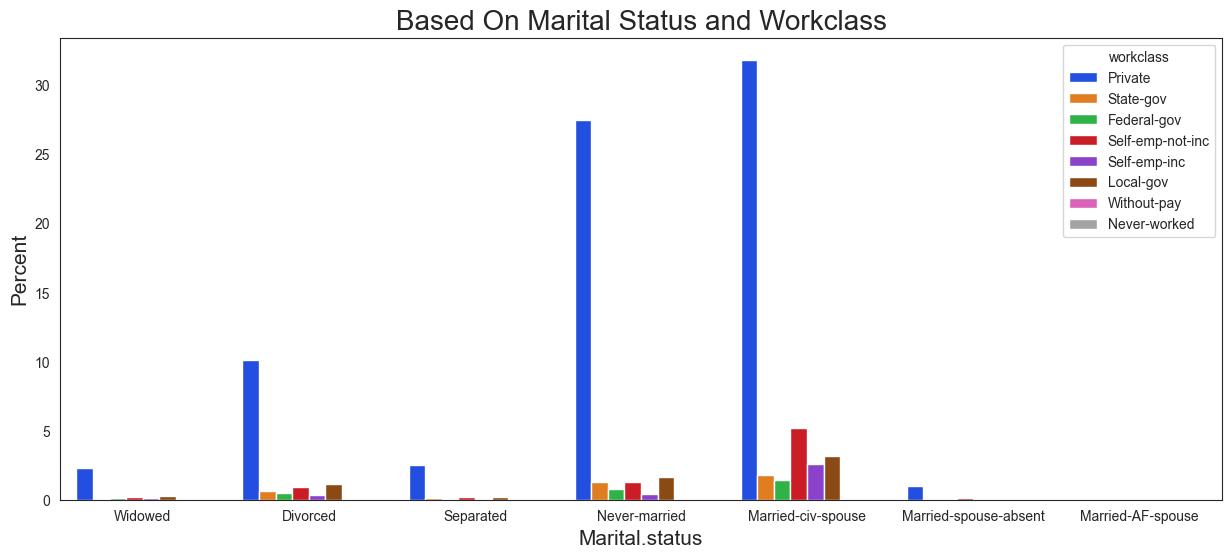

In [327]:
# Set the figure size
plt.figure(figsize = (15,6))

# Create a count plot for the "marital.status" column with hue based on "workclass"
sns.countplot(data=data, x="marital.status", stat="percent", hue="workclass", palette="bright")

# Set the plot title and axis labels
plt.title("Based On Marital Status and Workclass",size = 20)
plt.xlabel("Marital.status",fontsize = 15)
plt.ylabel("Percent",fontsize = 15)

# Show the plot
plt.show()

#### Above is the distribution of workclass by marital-status. Majority of singles and married-civ-spouse work in the private sector.

## Distribution Of Income Across Age

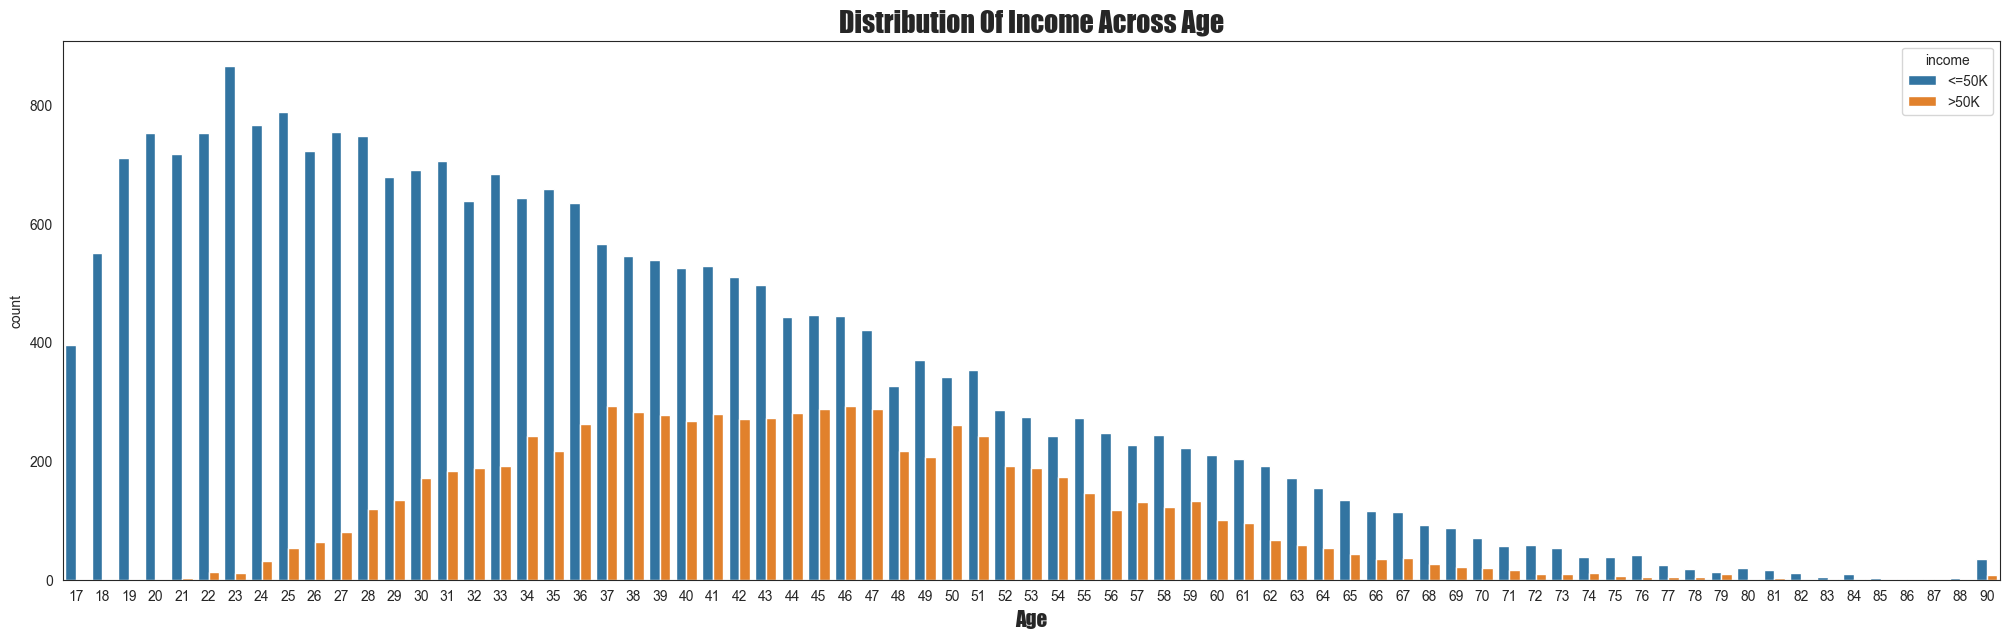

In [328]:
# Set the figure size
plt.figure(figsize = (25,7))

# Create a count plot for the "age" column with hue based on "income"
sns.countplot(x = "age",hue = "income",data = data)

# Set the plot title and axis labels with custom font properties
plt.title("Distribution Of Income Across Age",fontdict = {
    "fontname": "fantasy","fontsize": 20,"fontweight": "bold"})
plt.xlabel("Age",fontdict ={"fontname" : "fantasy","fontsize": 15})

# Show the plot
plt.show()

#### We infer that min salary of most of the population is in their 20's which is a valid as it is the starting time of a career
#### Here we can conclude that Age and salary are in direct proportion with each other.
#### The data is left skewed as there are a very few people who work after 60's,therefore,the chances of salary being more than 50k is very less.

## Gender

In [329]:
# Calculate the normalized value counts of the "sex" column as percentages
sex_percentage = data["sex"].value_counts(normalize=True) * 100

# Print the title and the calculated percentages
print("Percentage Distribution of Sex Categories")
print(sex_percentage)

Percentage Distribution of Sex Categories
sex
Male      66.920549
Female    33.079451
Name: proportion, dtype: float64


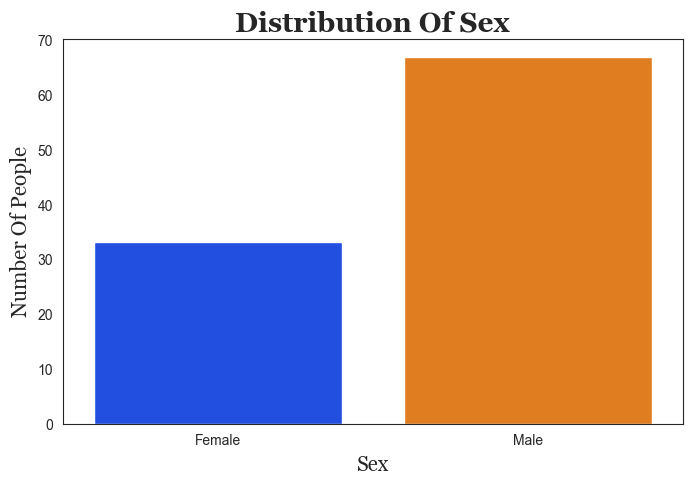

In [330]:
# Calculate the value counts for the "sex" column
sex = data["sex"].value_counts()

# Set the figure size
plt.figure(figsize = (8,5))

# Create a count plot for the "sex" column with percentages
sns.countplot(data=data, x= "sex", stat="percent",hue = "sex",palette="bright")

# Set the plot title and axis labels with custom font properties
plt.title("Distribution Of Sex",fontdict = {"fontname": "Georgia","fontsize" : 20, "fontweight" : "bold"})
plt.xlabel("Sex",fontdict = {"fontname" : "Georgia","fontsize" : 15})
plt.ylabel("Number Of People",fontdict = {"fontname": "Georgia","fontsize" : "15"})

# Show the plot
plt.show()

#### We can see from above that 67% of employees are males while only 33% are females.

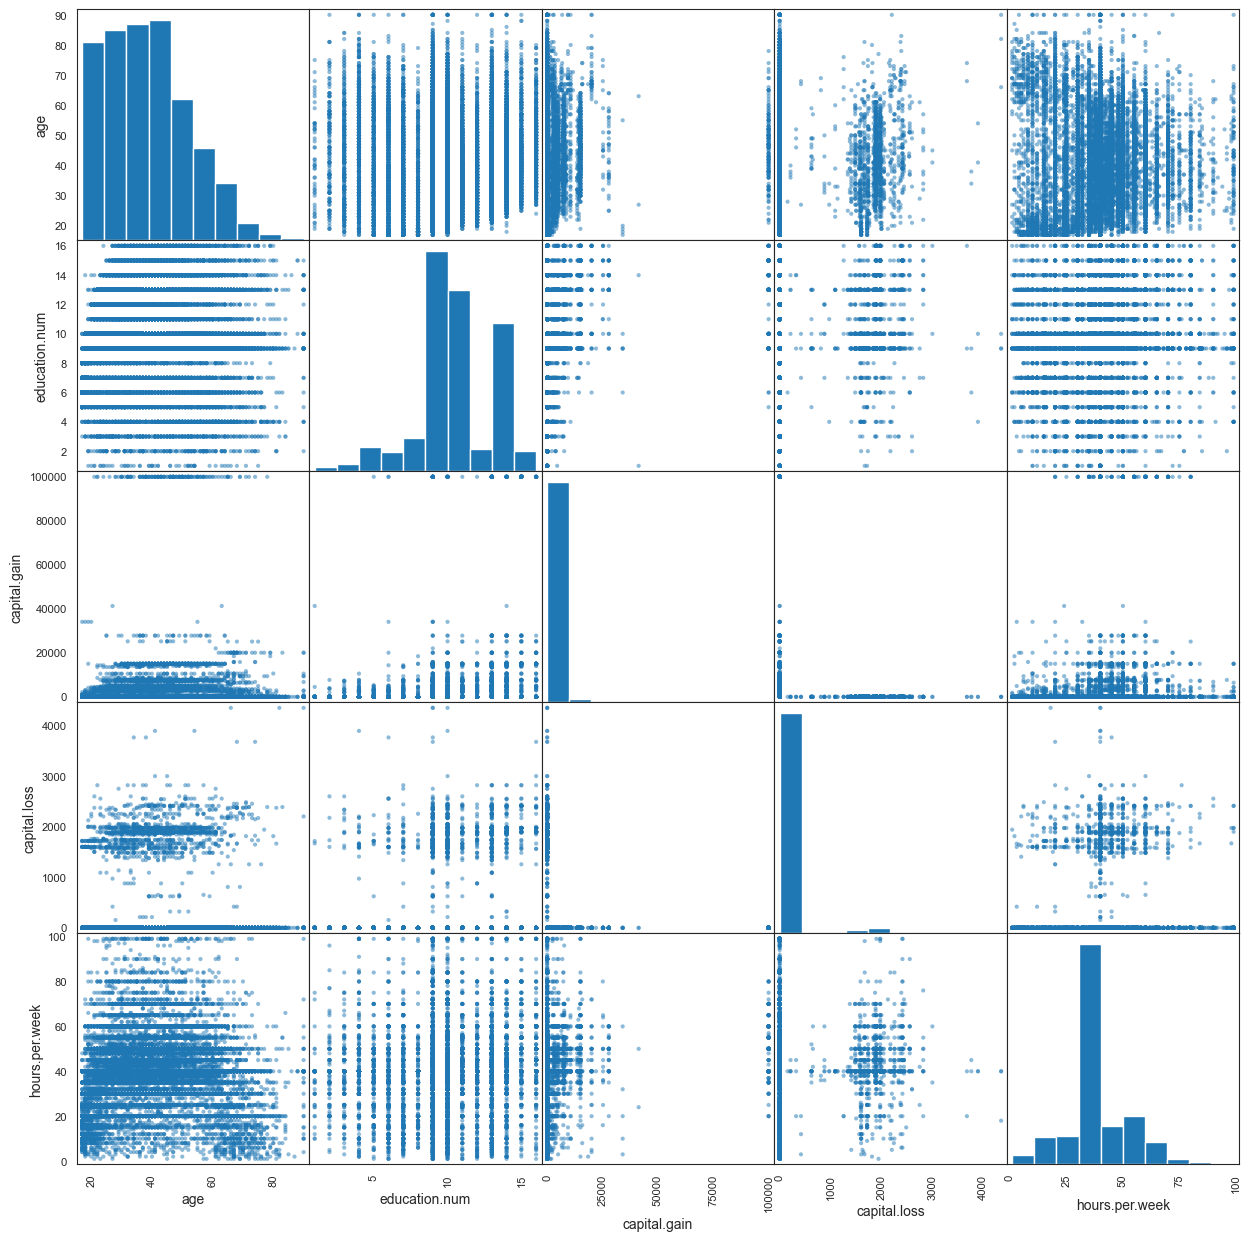

In [331]:
from pandas.plotting import scatter_matrix

# Create a scatter matrix plot of the DataFrame
scatter_matrix(data,figsize = (15,15));

# Show the plot
plt.show()

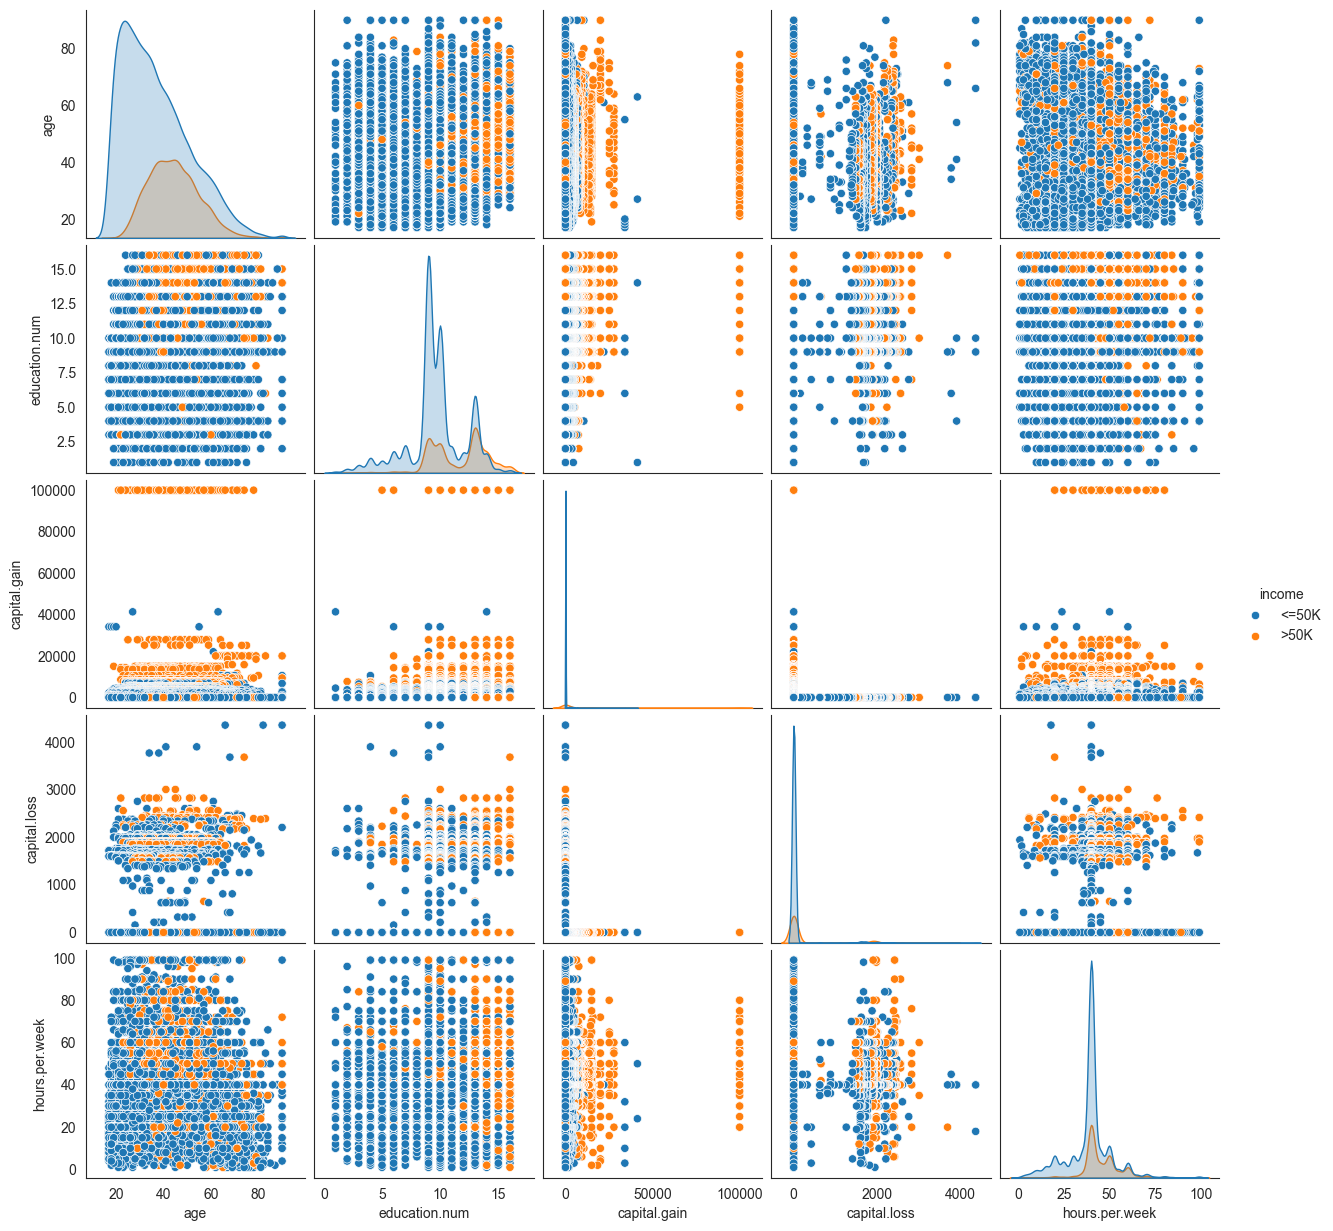

In [332]:
# Create a pairplot of the DataFrame with hue based on "income"
sns.pairplot(data = data, hue = "income")

# Show the plot
plt.show()

#### From above,we conclude that there is no sign of a linear correlation between the numerical columns.

## Separating Numerical & Categorical Data

In [333]:
#title for the data types of each column
data.dtypes

age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [334]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


In [335]:
# Select numerical columns from the DataFrame
data_num = data.select_dtypes(["int", "float"])

#display the numerical columns
data_num

,age,education.num,capital.gain,capital.loss,hours.per.week
0,90,9,0,4356,40
1,82,9,0,4356,18
2,66,10,0,4356,40
3,54,4,0,3900,40
4,41,10,0,3900,40
...,...,...,...,...,...
32556,22,10,0,0,40
32557,27,12,0,0,38
32558,40,9,0,0,40
32559,58,9,0,0,40


In [336]:
# Select categorical columns from the DataFrame
data_cat = data.select_dtypes(["object"])

#display the numerical columns
data_cat

,workclass,education,marital.status,occupation,relationship,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K


#### Here we have separated categorical and numerical columns for further pre processing.

## Label Encoding

In [337]:
# Importing the LabelEncoder from scikit-learn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [338]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for i in data_cat:
    data_cat[i] = le.fit_transform(data_cat[i])

# Display the encoded categorical data
data_cat

,workclass,education,marital.status,occupation,relationship,sex,native.country,income
0,3,11,6,9,1,0,38,0
1,3,11,6,3,1,0,38,0
2,3,15,6,9,4,0,38,0
3,3,5,0,6,4,0,38,0
4,3,15,5,9,3,0,38,0
...,...,...,...,...,...,...,...,...
32556,3,15,4,10,1,1,38,0
32557,3,7,2,12,5,0,38,0
32558,3,11,2,6,0,1,38,1
32559,3,11,6,0,4,0,38,0


#### Here we have obtained the Label Encoded categorical columns.

## Feature Scaling

In [339]:
# Importing StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

In [340]:
# Create an instance of StandardScaler for feature scaling
sc = StandardScaler()

In [341]:
# Scale the numerical features using StandardScaler
x_scaled = sc.fit_transform(data_num)

# Display the scaled numerical features
x_scaled

array([[ 3.76961234, -0.42005962, -0.14592048, 10.59350656, -0.03542945],
       [ 3.18311167, -0.42005962, -0.14592048, 10.59350656, -1.81720429],
       [ 2.01011032, -0.03136003, -0.14592048, 10.59350656, -0.03542945],
       ...,
       [ 0.10398314, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       [ 1.42360965, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       [-1.21564337, -0.42005962, -0.14592048, -0.21665953, -1.65522476]])

In [342]:
# Convert the scaled numerical data back to a DataFrame with original column names
data_num = pd.DataFrame(data = x_scaled,columns = data_num.columns)

# Display the DataFrame with scaled numerical features
data_num

,age,education.num,capital.gain,capital.loss,hours.per.week
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429
...,...,...,...,...,...
32556,-1.215643,-0.031360,-0.14592,-0.216660,-0.035429
32557,-0.849080,0.746039,-0.14592,-0.216660,-0.197409
32558,0.103983,-0.420060,-0.14592,-0.216660,-0.035429
32559,1.423610,-0.420060,-0.14592,-0.216660,-0.035429


#### Feature scaling process ensures that the numerical data is standardized, which is a common preprocessing step in machine learning to improve model performance and convergence.

## Concatenating numerical data and categorical data

In [343]:
# Concatenate the scaled numerical features with the categorical data
data_new = pd.concat([data_num,data_cat],axis = 1)

# Display the combined DataFrame with scaled numerical features and label encoded categorical data
data_new

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,sex,native.country,income
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,1,0,38,0
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,1,0,38,0
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,4,0,38,0
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,4,0,38,0
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,3,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,1,38,0
32557,-0.849080,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,5,0,38,0
32558,0.103983,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,0,1,38,1
32559,1.423610,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,4,0,38,0


#### Here we have concatenated label encoded Categorical data and feature scaled numerical data.This process is useful when preparing data for further analysis or machine learning tasks, where both numerical and categorical features need to be included in the same dataset.

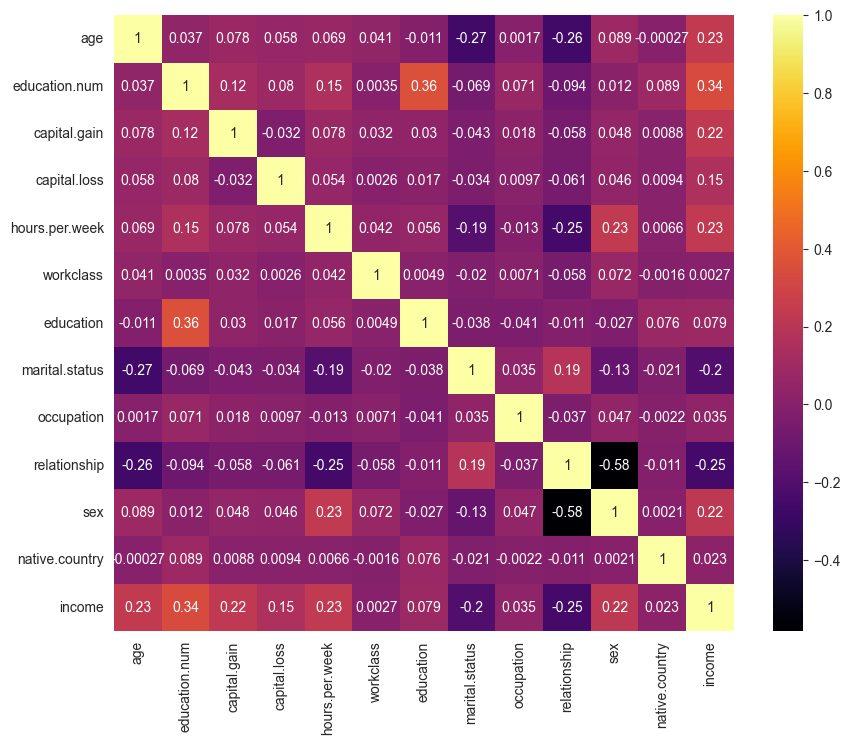

In [344]:
# Compute the correlation matrix of the combined DataFrame
corr = data_new.corr()

# Set the figure size for the heatmap
plt.figure(figsize = (10,8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr,cmap = "inferno", annot = True)

# Show the plot
plt.show()

## Splitting data into X & Y

In [345]:
# Create a DataFrame by dropping the 'income' column from the combined dataset
x = data_new.drop("income",axis = 1)

# Display the DataFrame without the 'income' column
x

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,sex,native.country
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,1,0,38
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,1,0,38
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,4,0,38
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,4,0,38
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,3,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,1,38
32557,-0.849080,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,5,0,38
32558,0.103983,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,0,1,38
32559,1.423610,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,4,0,38


In [346]:
# Extract the target variable from the combined dataset
y = data_new.iloc[:,12:13]

# Display the DataFrame containing the target variable
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


#### Here we separated the data into features(x) and target(y) variable.

In [347]:
# Calculate and format the percentage distribution of the 'income' column
income = data["income"].value_counts(normalize = True)
income_percentage = round(income * 100,2).astype("str") + "%"

# Display the formatted percentage distribution of income categories
print("Percentage Distribution of Income Categories")
print(income_percentage)

Percentage Distribution of Income Categories
income
<=50K    75.92%
>50K     24.08%
Name: proportion, dtype: object


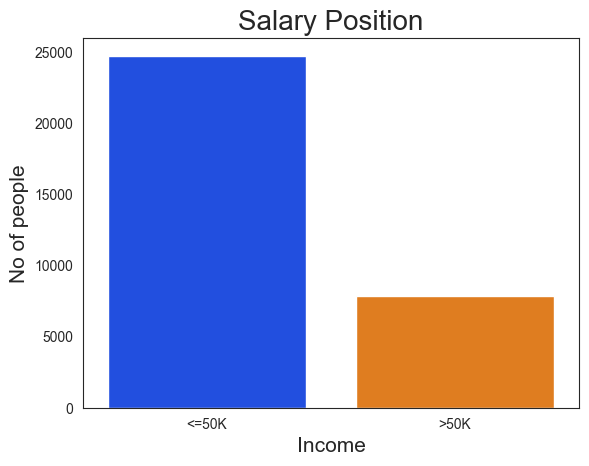

In [348]:
# Create a count plot for the 'income' column 
sns.countplot(x = "income",data = data,palette = "bright")

# Set the title and labels for the plot
plt.title("Salary Position",size = 20)
plt.xlabel("Income",size = 15)
plt.ylabel("No of people",size = 15)

# Show the plot
plt.show()

#### 75.92% of the employees earn 50K USD or less while the remaining 24.08% earn above 50k USD. Here we need to do upsampling to remove bias in training model as the data is imbalanced.

## Sampling

In [349]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler with a fixed random state
ros = RandomOverSampler(random_state = 42)

# Apply random oversampling to balance the class distribution in the dataset
x_ros,y_ros = ros.fit_resample(x,y)

In [350]:
# Assign the resampled features and target variable to new variables
x_new = x_ros
y_new = y_ros

<=50K ---> 0
>50k ----> 1


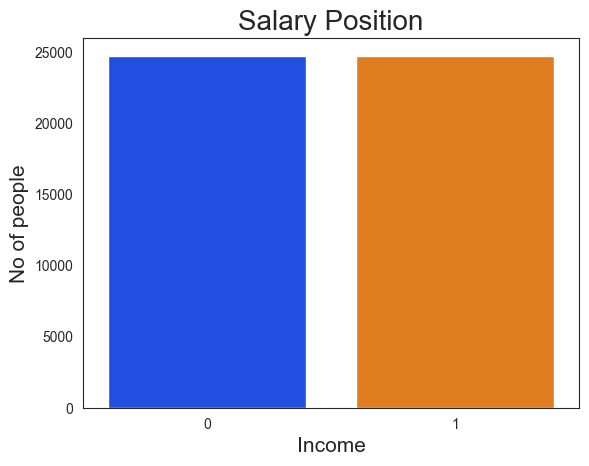

In [351]:
# Print the labels for the income categories
print("<=50K ---> 0")
print(">50k ----> 1")

# Create a count plot for the 'income' column in the resampled dataset
sns.countplot(x= "income",data = y_new,palette = "bright")

# Set the title and labels for the plot
plt.title("Salary Position",size = 20)
plt.xlabel("Income",size = 15)
plt.ylabel("No of people",size = 15)

# Show the plot
plt.show()

#### Above visualization helps to confirm that the oversampling process has balanced the distribution of income categories.
#### Here we have preferred Upsampling over downsampling because it helps to preserve all original data and improves the representation of the minority class without losing valuable information. However, the choice between upsampling and downsampling should be made based on the specific context of the problem, the size of the dataset, and the goals of the analysis.

In [352]:
# Display the shape of the feature set 'x'
x.shape

(32561, 12)

In [353]:
# Import necessary libraries and modules for machine learning, model evaluation, and hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [354]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size = 0.3,random_state = 42)

# Print the number of samples in the training and testing sets
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 34608 samples.
Testing set has 14832 samples.


In [355]:
# Display the shapes of the training feature set and target variable
print("Shape of Training Feature Set (X_train):", X_train.shape)
print("Shape of Training Target Variable (y_train):", y_train.shape)

Shape of Training Feature Set (X_train): (34608, 12)
Shape of Training Target Variable (y_train): (34608, 1)


In [356]:
# Display the shapes of the testing feature set and target variable
print("Shape of Testing Feature Set (X_test):", X_test.shape)
print("Shape of Testing Target Variable (y_test):", y_test.shape)

Shape of Testing Feature Set (X_test): (14832, 12)
Shape of Testing Target Variable (y_test): (14832, 1)


In [357]:
# Display the training feature set (X_train)
X_train

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,sex,native.country
39302,0.323921,0.357340,-0.145920,-0.216660,0.369519,3,8,2,3,0,1,38
42257,0.543859,1.523438,-0.145920,-0.216660,0.774468,3,12,0,3,1,0,38
46331,-0.115955,-0.031360,-0.145920,-0.216660,1.584366,3,15,2,3,0,1,38
44622,0.983734,-0.420060,-0.145920,-0.216660,0.288530,0,11,2,0,0,1,38
30387,0.910422,-0.420060,-0.145920,-0.216660,1.341397,0,11,2,3,0,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.470546,-0.031360,-0.145920,-0.216660,0.126550,0,15,0,0,4,1,38
44732,0.617171,1.134739,1.278554,-0.216660,0.369519,5,9,4,3,1,1,38
38158,0.617171,-0.420060,-0.145920,-0.216660,-0.035429,3,11,0,3,4,0,38
860,1.203672,-0.420060,-0.145920,4.466257,-0.035429,0,11,2,12,0,1,38


In [358]:
# Display the training target variable (y_train)
y_train

,income
39302,1
42257,1
46331,1
44622,1
30387,1
...,...
11284,0
44732,1
38158,1
860,1


In [359]:
# Initialize different machine learning classifiers
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state = 42)
svm = SVC()

In [371]:
# Define a function to train a model, make predictions, and print a classification report
def mymodel(model):
    # Train the model on the training data
    model.fit(X_train,y_train)
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    # Print the classification report to evaluate model performance
    print(classification_report(y_test,y_pred))

    # Generate the classification report and convert it into dictionary format
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting accuracy
    accuracy = report['accuracy']*100 
    print(f"Accuracy from Classification Report for {model} : {accuracy:.2f} %")
    
    # Return the trained model
    return model

In [372]:
#Evaluating Logistic Regression Model with Classification Report
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7393
           1       0.77      0.77      0.77      7439

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832

Accuracy from Classification Report for LogisticRegression() : 76.71 %


LogisticRegression()

In [373]:
#Evaluating KNeighborsClassifier Model with Classification Report
mymodel(knn)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7393
           1       0.80      0.89      0.84      7439

    accuracy                           0.83     14832
   macro avg       0.84      0.83      0.83     14832
weighted avg       0.84      0.83      0.83     14832

Accuracy from Classification Report for KNeighborsClassifier() : 83.08 %


KNeighborsClassifier()

In [374]:
#Evaluating Decision Tree Classifier Model with Classification Report
mymodel(dt)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7393
           1       0.86      0.94      0.90      7439

    accuracy                           0.89     14832
   macro avg       0.90      0.89      0.89     14832
weighted avg       0.90      0.89      0.89     14832

Accuracy from Classification Report for DecisionTreeClassifier() : 89.31 %


DecisionTreeClassifier()

In [375]:
#Evaluating Random Forest Classifier Model with Classification Report
mymodel(rf)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7393
           1       0.88      0.95      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Accuracy from Classification Report for RandomForestClassifier(random_state=42) : 90.86 %


RandomForestClassifier(random_state=42)

In [376]:
#Evaluating SVC with Classification Report
mymodel(svm)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      7393
           1       0.75      0.81      0.78      7439

    accuracy                           0.77     14832
   macro avg       0.78      0.77      0.77     14832
weighted avg       0.78      0.77      0.77     14832

Accuracy from Classification Report for SVC() : 77.39 %


SVC()

## Logistic regression algorithm using Grid Search CV

In [377]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter Grid for Logistic Regression Tuning
grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2","elasticnet"],
        "solver": ["lbfgs","newton-cg","liblinear","sag","saga"]       
       }

In [378]:
#Initializing Logistic Regression Model
logreg = LogisticRegression()

In [379]:
#Configuring Grid Search with Logistic Regression
logreg_cv = GridSearchCV(logreg,grid,verbose = 4)

In [380]:
#Fitting Logistic Regression Model with Grid Search
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.758 total time=   0.2s
[CV 2/5] END C=0.001, penalty=l1, solv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=4)

In [381]:
#Displaying Best Estimator and Parameters from Grid Search
print("Best estimator result :",logreg_cv.best_estimator_)
print("Best_params result :",logreg_cv.best_params_)

Best estimator result : LogisticRegression(C=0.1)
Best_params result : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [382]:
#Training and Evaluating Logistic Regression Model with Specific Best Parameters Obtained From Grid Search CV
logistic = LogisticRegression(C = 0.1,penalty = "l2",solver = "lbfgs")

# Fit the Logistic Regression model, make predictions, and print the classification report
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7393
           1       0.77      0.77      0.77      7439

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



## KNeighbors Classifier Using GridSearchCV

In [383]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [384]:
#Initialize the K-Nearest Neighbors classifier and set up parameter grid for tuning
knn = KNeighborsClassifier()

# Range of values for the number of neighbors
k_range = list(range(1,31))

# Parameter grid for GridSearchCV
param_grid = dict(n_neighbors = k_range)

In [385]:
# Initialize GridSearchCV for tuning K-Nearest Neighbors hyperparameters
grid = GridSearchCV(knn,param_grid,cv = 10,scoring = "accuracy",return_train_score = False,verbose = 1)

In [386]:
# Fit the GridSearchCV object to the training data to find the best hyperparameters
grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [387]:
# Print the best estimator and best parameters found by GridSearchCV
print("Best estimator result :",grid.best_estimator_)
print("Best_params result :",grid.best_params_)

Best estimator result : KNeighborsClassifier(n_neighbors=1)
Best_params result : {'n_neighbors': 1}


In [394]:
# Train a K-Nearest Neighbors classifier with 1 neighbor, make predictions, and print the classification report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      7393
           1       0.86      0.93      0.89      7439

    accuracy                           0.88     14832
   macro avg       0.89      0.88      0.88     14832
weighted avg       0.89      0.88      0.88     14832



## Decision Tree Algorithm Using GridSearchCV

In [402]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [403]:
# Define the parameter grid for tuning Decision Tree hyperparameters
param_grid = { "max_depth" : ["none",10,20,30],             # Maximum depth of the tree
               "min_samples_split" : [2,5,10],              # Minimum number of samples required to split an internal node
               "min_samples_leaf" : [1,2,4],                # Minimum number of samples required to be at a leaf node
               "max_features" : ["auto","sqrt","log2"],     # Number of features to consider when looking for the best split
               "criterion": ["gini","entropy"]              # Function to measure the quality of a split
             }

In [404]:
# Initialize GridSearchCV for hyperparameter tuning of the Decision Tree classifier
gs = GridSearchCV(dt,param_grid,cv = 5,verbose = 4)

In [405]:
# Fit the GridSearchCV object to the training data to find the best hyperparameters for the Decision Tree classifier
gs.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['none', 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

In [406]:
# Print the best estimator and best parameters found by GridSearchCV
print("Best estimator result :",gs.best_estimator_)
print("Best_params result :",gs.best_params_)

Best estimator result : DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')
Best_params result : {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [407]:
# Train a Decision Tree classifier with specified hyperparameters, make predictions, and print the classification report
dt = DecisionTreeClassifier(criterion = "entropy",max_depth = 30,max_features = "sqrt",min_samples_leaf = 1,min_samples_split = 2)

# Fit the model to the training data
dt.fit(X_train,y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7393
           1       0.85      0.94      0.89      7439

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



## Random Forest Algorithm using Grid Search CV

In [408]:
# Initialize the Random Forest classifier with a fixed random state
rf = RandomForestClassifier(random_state = 42)

In [409]:
# Fit the Random Forest classifier to the training data, make predictions, and calculate the accuracy score
rf.fit(X_train,y_train)

# Train the Random Forest model
y_pred = rf.predict(X_test)

# Make predictions on the test data
accuracy_score(y_test,y_pred)*100

90.85760517799353

In [410]:
# Defining hyperparameters for tuning the Random Forest model

#Number of trees in random forest
n_estimators = [20,60,100,120]

#Number of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

In [411]:
# Define the parameter grid for tuning the Random Forest model and print it
param_grid = {"n_estimators": n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "max_samples" : max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [412]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier()

In [413]:
# Initialize GridSearchCV for tuning Random Forest hyperparameters with the specified parameter grid
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1)

In [414]:
# Fit the GridSearchCV object to the training data to find the best hyperparameters for the Random Forest model
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [415]:
# Print the best estimator and best parameters found by GridSearchCV for the Random Forest model
print("Best estimator result :",rf_grid.best_estimator_)
print("Best_params result :",rf_grid.best_params_)

Best estimator result : RandomForestClassifier(max_features=0.2, max_samples=1.0)
Best_params result : {'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 100}


In [416]:
# Train a Random Forest classifier with specific hyperparameters, make predictions, and print the classification report
rf = RandomForestClassifier(max_depth = None,max_features = 0.2,max_samples = 1.0, n_estimators = 100)

# Fit the Random Forest model to the training data
rf.fit(X_train,y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      7393
           1       0.88      0.95      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



## Support Vector Machine Algorithm

In [417]:
# Evaluate the Support Vector Machine (SVM) model
mymodel(svm)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      7393
           1       0.75      0.81      0.78      7439

    accuracy                           0.77     14832
   macro avg       0.78      0.77      0.77     14832
weighted avg       0.78      0.77      0.77     14832

Accuracy from Classification Report for SVC() : 77.39 %


SVC()

In [418]:
accuracy_data = {
    "Algorithm": ["Logistic Regression", "K Neighbors Classifier", "Decision Tree Classifier", "RandomForestClassifier", "Support Vector Classifier"],
    "Accuracy": [76.71, 89.01, 89.23, 90.86, 77.39]
}

# Creating the DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

#displaying dataframe
accuracy_df

,Algorithm,Accuracy
0,Logistic Regression,76.71
1,K Neighbors Classifier,89.01
2,Decision Tree Classifier,89.23
3,RandomForestClassifier,90.86
4,Support Vector Classifier,77.39


#### From above, we can conclude that Random Forest Classifier has the highest accuracy with a score of 90.86%. This indicates that the Random Forest algorithm performs the best among the ones listed for the given dataset.
#### Logistic Regression has the lowest accuracy with a score of 76.71%. This suggests that it is the least effective model in this comparison for this dataset.

## Conclusion

#### The RandomForestClassifier is the most accurate model in this comparison, achieving the highest accuracy, while Logistic Regression has the lowest accuracy. The other classifiers fall in between, with the K Neighbors and Decision Tree models showing strong performance but not quite matching the Random Forest's accuracy.